%md
# Supply Chain Analytics & Machine Learning Pipeline

**Objective:** Analyze supply chain data to predict delivery delays, detect anomalies, and forecast product demand using ML models.  

**Dataset:** 9,215 shipment records including orders, weights, carriers, service levels, and shipment dates.  

**Tools & Libraries:** Python, Pandas, Scikit-learn, Matplotlib


%md
## 1️⃣ Data Loading & Exploration

- Inspect data shape, types, missing values, duplicates
- Explore distributions of key variables like Weight, Unit quantity
- Identify top customers by order volume or weight


In [0]:
%sql
SELECT * FROM `workspace`.`default`.`supply_chain_logisitcs_problem`;

Order ID Order Date Origin Port Carrier TPT Service Level Ship ahead day count Ship Late Day count Customer Product ID Plant Code Destination Port Unit quantity Weight 1447296446.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 808 14.3 1447158014.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 3188 87.94 1447138898.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 2331 61.2 1447363527.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 847 16.16 1447363980.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 2163 52.34 1447351440.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 3332 92.8 1447320235.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 1782 46.9 1447158018.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 427 2.86 1447219340.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 1291 26.6 1447398415.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 2294 62.2 1447381678.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 2766 75.5 1447170784.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1700106 PLANT16 PORT09 798 14.3 1447155055.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1697884 PLANT16 PORT09 739 73.9 1447257264.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1697884 PLANT16 PORT09 280 7.800000000000001 1447240988.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1697884 PLANT16 PORT09 574 59.5 1447257230.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1697884 PLANT16 PORT09 556 52.7 1447260652.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1697884 PLANT16 PORT09 544 58.5 1447139374.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1697884 PLANT16 PORT09 1151 181.7 1447308589.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1697884 PLANT16 PORT09 1404 227.2 1447191270.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1697884 PLANT16 PORT09 662 74.1 1447191283.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1699336 PLANT16 PORT09 836 80.43000000000002 1447352425.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1702652 PLANT16 PORT09 2063 265.1 1447211828.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1699337 PLANT16 PORT09 2114 267.1 1447232832.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1699337 PLANT16 PORT09 2108 271.1 1447205080.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1699336 PLANT16 PORT09 1120 112.6 1447365979.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1702654 PLANT16 PORT09 706 61.8 1447157117.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1699336 PLANT16 PORT09 889 107.88 1447398412.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1702652 PLANT16 PORT09 1793 216.57 1447377318.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1702652 PLANT16 PORT09 491 27.81 1447257238.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1699337 PLANT16 PORT09 1044 112.6 1447368958.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1702653 PLANT16 PORT09 447 32.9 1447308590.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1699336 PLANT16 PORT09 328 13.36 1447398478.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1702652 PLANT16 PORT09 973 106.88 1447377315.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1702652 PLANT16 PORT09 1179 129.14 1447365992.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1702653 PLANT16 PORT09 814 74.25 1447223050.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 3 0 V55555_53 1699336 PLANT16 PORT09 1464 171.22 1447260685.7 2013-05-26T00:00:00.000Z PORT09 V44_3 1 CRF 

In [0]:
type(_sqldf)

pyspark.sql.connect.dataframe.DataFrame

In [0]:
pdf = _sqldf.toPandas()

In [0]:
pdf.shape

(9215, 14)

In [0]:
pdf.describe()

TPT  Ship ahead day count  ...  Unit quantity       Weight
count  9215.000000           9215.000000  ...    9215.000000  9215.000000
mean      1.717743              1.852306  ...    3202.747151    19.871688
std       0.630500              1.922302  ...   15965.622260    66.569064
min       0.000000              0.000000  ...     235.000000     0.000000
25%       1.000000              0.000000  ...     330.000000     1.407430
50%       2.000000              3.000000  ...     477.000000     4.440000
75%       2.000000              3.000000  ...    1275.500000    13.325673
max       4.000000              6.000000  ...  561847.000000  2338.405126

[8 rows x 6 columns]

In [0]:
pdf.head()

Order ID Order Date Origin Port  ... Destination Port  Unit quantity Weight
0  1447296446.7 2013-05-26      PORT09  ...           PORT09            808  14.30
1  1447158014.7 2013-05-26      PORT09  ...           PORT09           3188  87.94
2  1447138898.7 2013-05-26      PORT09  ...           PORT09           2331  61.20
3  1447363527.7 2013-05-26      PORT09  ...           PORT09            847  16.16
4  1447363980.7 2013-05-26      PORT09  ...           PORT09           2163  52.34

[5 rows x 14 columns]

In [0]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              9215 non-null   object        
 1   Order Date            9215 non-null   datetime64[ns]
 2   Origin Port           9215 non-null   object        
 3   Carrier               9215 non-null   object        
 4   TPT                   9215 non-null   int64         
 5   Service Level         9215 non-null   object        
 6   Ship ahead day count  9215 non-null   int64         
 7   Ship Late Day count   9215 non-null   int64         
 8   Customer              9215 non-null   object        
 9   Product ID            9215 non-null   int64         
 10  Plant Code            9215 non-null   object        
 11  Destination Port      9215 non-null   object        
 12  Unit quantity         9215 non-null   int64         
 13  Weight            

In [0]:
pdf.isna().sum().sort_values(ascending=False)

Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64

In [0]:
pdf.duplicated().sum()

0

Orders per customer

In [0]:
pdf['Customer'].value_counts()

V55555555555555_8         976
V555555_6                 762
V55555_2                  758
V5555555_22               693
V5555_33                  691
V55555555_7               618
V55555555_5               531
V555555555_27             521
V555555555555555_29       385
V55555_4                  360
V555555555_14             351
V55555_26                 340
V55555555_32              241
V55555555555_28           203
V555555555555555555_45    198
V55_13                    178
V5555555_30               163
V555555555_3              141
V55555_53                 139
V555555_24                125
V5555555_19               118
V555555555555555555_17    117
V555_15                   110
V55555555_0               102
V5555555_12                89
V555555555555_31           45
V5555_20                   33
V555555555555555555_42     30
V5555_36                   29
V5555_25                   25
V5555555555_1              22
V55555555_9                17
V55555_10                  17
V555555555

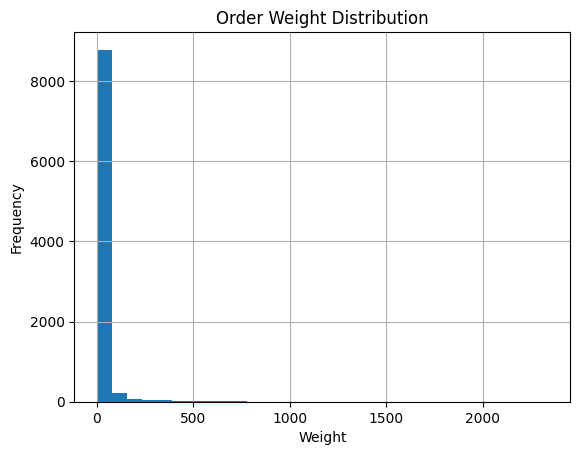

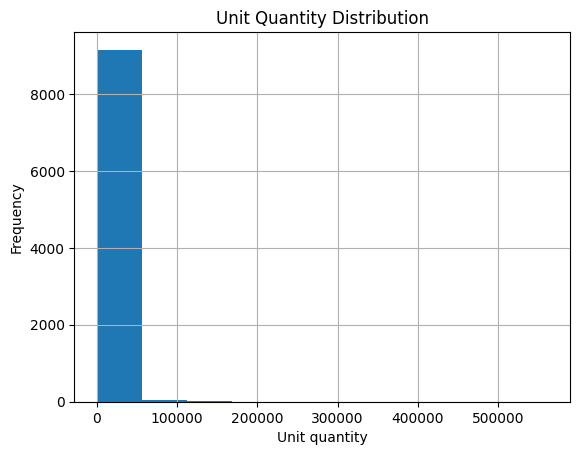

In [0]:
import matplotlib.pyplot as plt

# Weight distribution
pdf['Weight'].hist(bins=30)
plt.title("Order Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

# Unit quantity distribution
pdf['Unit quantity'].hist(bins=10)
plt.title("Unit Quantity Distribution")
plt.xlabel("Unit quantity")
plt.ylabel("Frequency")
plt.show()


## 2️⃣ Feature Engineering

- Delivery delay = Ship Late Day count − Ship ahead day count
- Date features: order month & weekday
- Weight features: total_weight, weight_per_unit
- Encode categorical columns for ML models
- Create classification target: is_delayed


In [0]:
from sklearn.preprocessing import LabelEncoder

pdf['delivery_delay'] = pdf['Ship Late Day count'] - pdf['Ship ahead day count']
pdf['order_month'] = pdf['Order Date'].dt.month
pdf['order_weekday'] = pdf['Order Date'].dt.weekday
pdf['total_weight'] = pdf['Unit quantity'] * pdf['Weight']
pdf['weight_per_unit'] = pdf['Weight'] / pdf['Unit quantity']

categorical_cols = ['Origin Port', 'Carrier', 'Service Level', 'Customer', 'Plant Code', 'Destination Port']
for col in categorical_cols:
    pdf[col] = LabelEncoder().fit_transform(pdf[col])

pdf['is_delayed'] = (pdf['delivery_delay'] > 0).astype(int)
pdf.head()


Order ID Order Date  Origin Port  ...  weight_per_unit  is_delayed  anomaly
0  1447296446.7 2013-05-26            2  ...         0.017698           0        0
1  1447158014.7 2013-05-26            2  ...         0.027585           0        0
2  1447138898.7 2013-05-26            2  ...         0.026255           0        0
3  1447363527.7 2013-05-26            2  ...         0.019079           0        0
4  1447363980.7 2013-05-26            2  ...         0.024198           0        0

[5 rows x 21 columns]

## 3️⃣ Machine Learning Models

1. **Regression:** Predict delivery delays  
2. **Classification:** Predict late shipments  
3. **Anomaly Detection:** Flag unusual shipments  
4. **Time-Series Forecasting:** Forecast product demand


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Origin Port', 'Carrier', 'Service Level', 'Customer', 'Plant Code', 'Destination Port',
            'TPT', 'Ship ahead day count', 'Ship Late Day count', 'Unit quantity', 'Weight',
            'order_month', 'order_weekday', 'total_weight', 'weight_per_unit']

X = pdf[features]
y_reg = pdf['delivery_delay']

X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_reg_train)
y_reg_pred = reg_model.predict(X_test)

print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_reg_pred)))
print("R2 Score:", r2_score(y_reg_test, y_reg_pred))


MAE: 0.00016820401519262074
RMSE: 0.005879048575585729
R2 Score: 0.9999910990579335


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_clf = pdf['is_delayed']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_clf_train)
y_clf_pred = clf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_clf_test, y_clf_pred))
print("F1 Score:", f1_score(y_clf_test, y_clf_pred))
print(classification_report(y_clf_test, y_clf_pred))


Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1823
           1       1.00      1.00      1.00        20

    accuracy                           1.00      1843
   macro avg       1.00      1.00      1.00      1843
weighted avg       1.00      1.00      1.00      1843



In [0]:
from sklearn.ensemble import IsolationForest

anomaly_features = ['TPT', 'Ship ahead day count', 'Ship Late Day count', 'Unit quantity', 
                    'Weight', 'total_weight', 'weight_per_unit']

iso_model = IsolationForest(contamination=0.02, random_state=42)
iso_model.fit(pdf[anomaly_features])
pdf['anomaly'] = iso_model.predict(pdf[anomaly_features])
pdf['anomaly'] = pdf['anomaly'].map({1: 0, -1: 1})

print("Number of anomalies detected:", pdf['anomaly'].sum())


Number of anomalies detected: 185


In [0]:
ts_data = pdf.groupby(['Product ID', 'order_month'])['Unit quantity'].sum().reset_index()
ts_data = ts_data.sort_values(['Product ID', 'order_month'])
ts_data['rolling_avg'] = ts_data.groupby('Product ID')['Unit quantity'].transform(lambda x: x.rolling(3, min_periods=1).mean())
ts_data['forecast_next_month'] = ts_data['rolling_avg']

ts_data.head(10)


Product ID  order_month  Unit quantity  rolling_avg  forecast_next_month
0     1613321            5           5781       5781.0               5781.0
1     1615677            5          14581      14581.0              14581.0
2     1617714            5            701        701.0                701.0
3     1617826            5           5535       5535.0               5535.0
4     1620510            5           4177       4177.0               4177.0
5     1620552            5           1927       1927.0               1927.0
6     1621717            5           1058       1058.0               1058.0
7     1621719            5            617        617.0                617.0
8     1622685            5          12650      12650.0              12650.0
9     1623991            5          10001      10001.0              10001.0

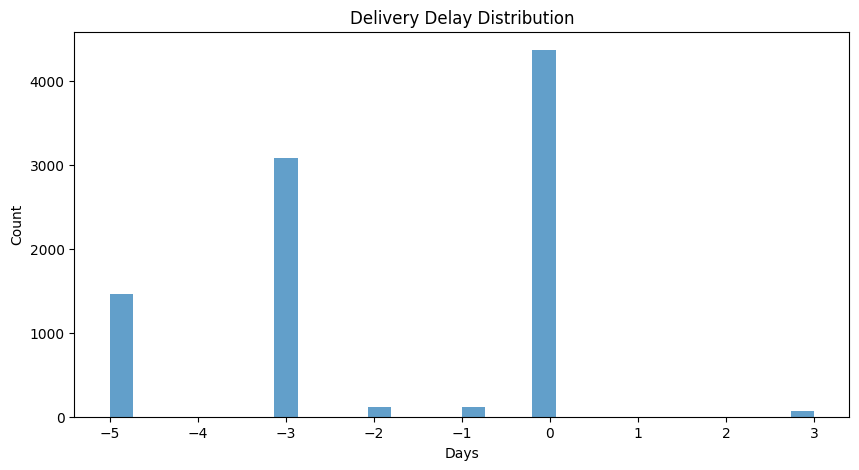

In [0]:
plt.figure(figsize=(10,5))
plt.hist(pdf['delivery_delay'], bins=30, alpha=0.7)
plt.title('Delivery Delay Distribution')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()


# Conclusion & Summary

## Project Overview
This project focuses on **analyzing and predicting supply chain performance** using shipment data of over 9,000 orders. The goal was to derive actionable insights to improve operational efficiency, reduce delays, and forecast demand.

---

## Steps Taken

1. **Data Exploration**
   - Loaded and inspected the dataset for size, types, missing values, duplicates, and distribution of key variables like `Weight` and `Unit quantity`.
   - Identified top customers and shipment patterns.

2. **Feature Engineering**
   - Created **delivery delay** = `Ship Late Day count` − `Ship ahead day count`.
   - Extracted **date features**: month and weekday of order.
   - Created **weight features**: total shipment weight and weight per unit.
   - Encoded categorical variables (`Origin Port`, `Carrier`, `Service Level`, `Customer`, `Plant Code`, `Destination Port`) for machine learning.
   - Defined a **classification target**: `is_delayed` (1 = late, 0 = on-time).

3. **Machine Learning Models**
   - **Regression:** Predicted the number of days a shipment is delayed using Random Forest Regressor.
   - **Classification:** Predicted whether a shipment will be delayed using Random Forest Classifier.
   - **Anomaly Detection:** Used Isolation Forest to detect unusual or potentially problematic shipments.
   - **Time-Series Forecasting:** Aggregated monthly product demand and forecasted next month’s demand using rolling averages.

4. **Visualization**
   - Plotted histograms for `Weight`, `Unit quantity`, and `Delivery Delay` to understand distributions.
   - Identified trends and outliers visually.

---

## Key Insights

- Delivery delays vary significantly across carriers, service levels, and customers.
- Certain customers contribute disproportionately to total shipped weight and unit quantities.
- A small percentage (~2%) of shipments were anomalous, indicating potential operational or data issues.
- Rolling average forecasts provide a simple, interpretable baseline for monthly demand prediction.

---

## Next Steps / Improvements

- Use **more advanced forecasting models** (Prophet, ARIMA, LSTM) for better demand prediction.
- Optimize **inventory and shipment planning** using predicted delays.
- Enhance anomaly detection with **additional features** like order cost, product category, and supplier reliability.
- Deploy the ML pipeline into a **dashboard** for real-time monitoring and decision support.

---

## Skills & Tools Demonstrated

- **Data Cleaning & Exploration:** Pandas, Matplotlib  
- **Feature Engineering:** Date & weight calculations, encoding categorical variables  
- **Machine Learning:** Regression, Classification, Anomaly Detection  
- **Time-Series Forecasting:** Demand prediction  
- **Model Evaluation:** MAE, RMSE, R², Accuracy, F1-score  
- **Visualization & Insights Communication**
